In [1]:
# Importing Essentials Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Data PreProcessing

In [2]:
# Import (Read) Data
data = pd.read_csv("C:\Local Disk (A);\Data Analyst-Science\Data Science Live File\\3 Movie\Movie-Ratings.csv")

In [3]:
data

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [4]:
# Check Data Type, Connts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [5]:
data.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [6]:
# Changing Column Name
data.columns = ['Film', 'Genre', 'RottenTomatoesRatings', 'AudienceRatings',
       'Budget', 'Year']

In [7]:
data.Year = data.Year.astype('category')

In [8]:
data.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Film                   559 non-null    object  
 1   Genre                  559 non-null    object  
 2   RottenTomatoesRatings  559 non-null    int64   
 3   AudienceRatings        559 non-null    int64   
 4   Budget                 559 non-null    int64   
 5   Year                   559 non-null    category
dtypes: category(1), int64(3), object(2)
memory usage: 22.7+ KB


In [10]:
# Check Null Values
data.isnull().sum()

Film                     0
Genre                    0
RottenTomatoesRatings    0
AudienceRatings          0
Budget                   0
Year                     0
dtype: int64

In [11]:
# Find Duplicated Values
data.duplicated().sum()

0

# Data Visualization

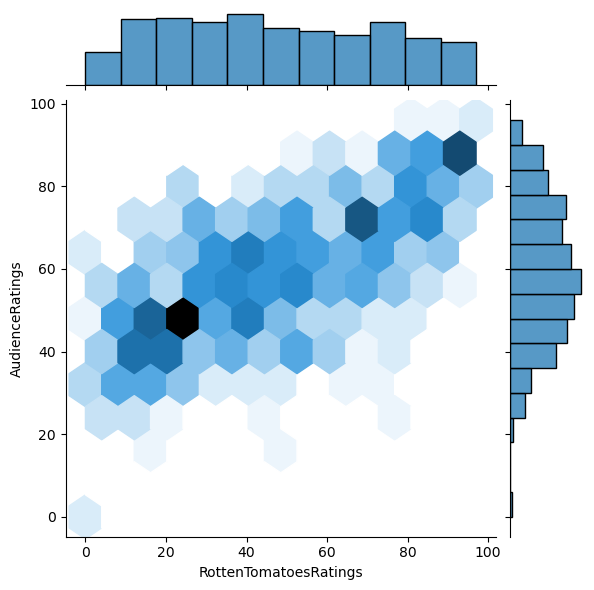

In [12]:
sns.jointplot(data=data, x='RottenTomatoesRatings', y='AudienceRatings', kind = 'hex')

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AudienceRatings', ylabel='Density'>

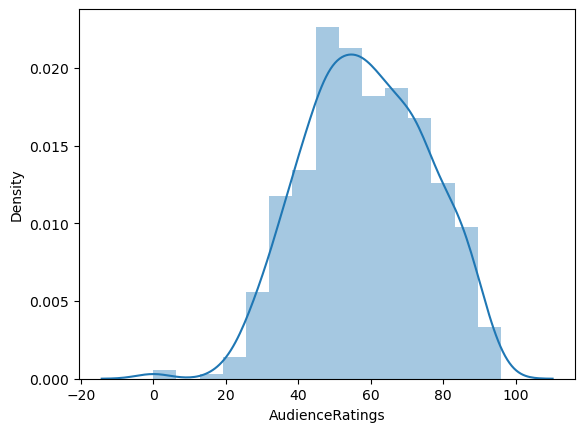

In [13]:
sns.distplot(data.AudienceRatings, bins=15)

(array([ 2.,  0.,  1.,  5., 20., 42., 48., 81., 76., 65., 67., 60., 45.,
        35., 12.]),
 array([ 0. ,  6.4, 12.8, 19.2, 25.6, 32. , 38.4, 44.8, 51.2, 57.6, 64. ,
        70.4, 76.8, 83.2, 89.6, 96. ]),
 <BarContainer object of 15 artists>)

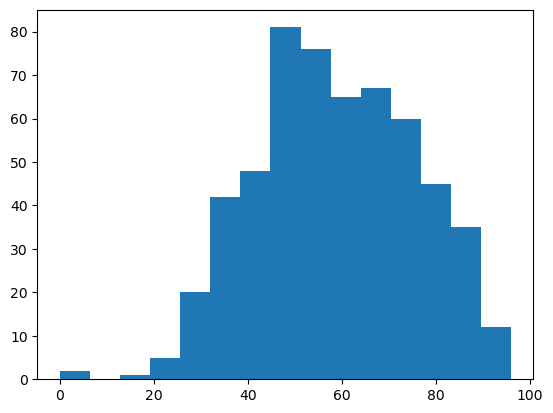

In [14]:
plt.hist(data.AudienceRatings, bins=15)

(array([19., 32., 51., 41., 46., 41., 47., 38., 47., 28., 37., 32., 42.,
        29., 29.]),
 array([ 0.        ,  6.46666667, 12.93333333, 19.4       , 25.86666667,
        32.33333333, 38.8       , 45.26666667, 51.73333333, 58.2       ,
        64.66666667, 71.13333333, 77.6       , 84.06666667, 90.53333333,
        97.        ]),
 <BarContainer object of 15 artists>)

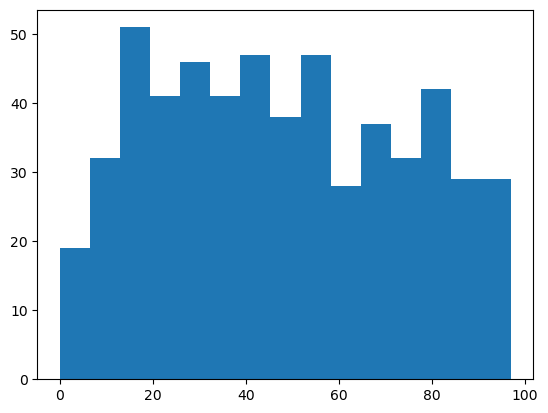

In [15]:
plt.hist(data.RottenTomatoesRatings, bins=15)

(array([134., 183.,  82.,  50.,  33.,  20.,  11.,  20.,   6.,   5.,   9.,
          2.,   3.,   0.,   1.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300.]),
 <BarContainer object of 15 artists>)

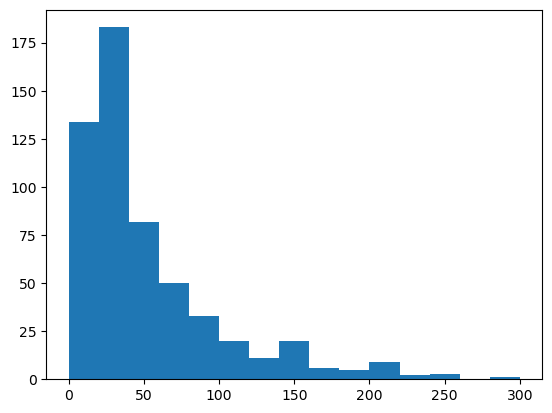

In [16]:
plt.hist(data.Budget, bins=15)

(array([ 2.,  0.,  1.,  5., 20., 42., 48., 81., 76., 65., 67., 60., 45.,
        35., 12.]),
 array([ 0. ,  6.4, 12.8, 19.2, 25.6, 32. , 38.4, 44.8, 51.2, 57.6, 64. ,
        70.4, 76.8, 83.2, 89.6, 96. ]),
 <BarContainer object of 15 artists>)

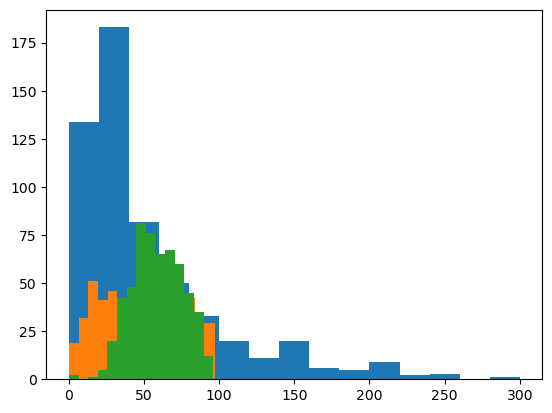

In [17]:
# Compare Budget and Ratings Data
plt.hist(data.Budget, bins=15)
plt.hist(data.RottenTomatoesRatings, bins=15)
plt.hist(data.AudienceRatings, bins=15)

(array([11.,  9.,  2.,  5.,  2.,  4.,  1.,  0.,  1.,  1.]),
 array([  4. ,  22.1,  40.2,  58.3,  76.4,  94.5, 112.6, 130.7, 148.8,
        166.9, 185. ]),
 <BarContainer object of 10 artists>)

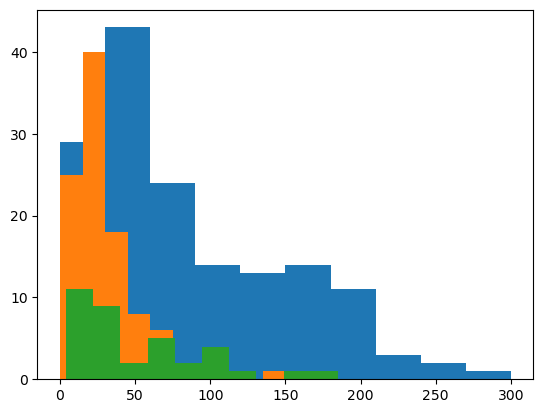

In [18]:
# Compare Budget of Action, Drama, Thriller
plt.hist(data[data.Genre == 'Action'].Budget)
plt.hist(data[data.Genre == 'Drama'].Budget)
plt.hist(data[data.Genre == 'Thriller'].Budget)

(array([[ 9., 39., 24., 13., 16.,  9.,  8., 14.,  5.,  4.,  8.,  2.,  2.,
          0.,  1.],
        [48., 80., 35., 19., 18., 10.,  8., 15.,  5.,  4.,  8.,  2.,  2.,
          0.,  1.],
        [52., 94., 39., 24., 20., 14.,  9., 16.,  5.,  5.,  8.,  2.,  2.,
          0.,  1.]]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300.]),
 <a list of 3 BarContainer objects>)

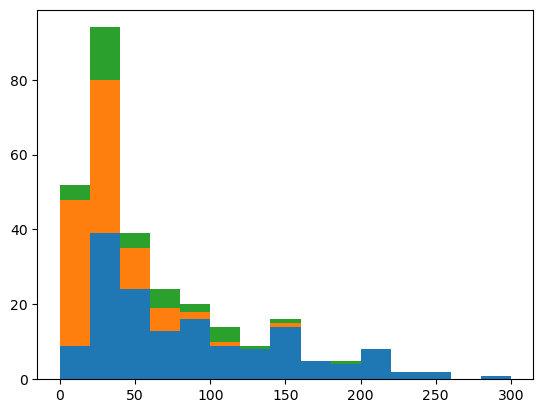

In [19]:
#This is Stacked Histogram Budget of Action Drama Thriller are in One Line. Last Histogram is without stacked
plt.hist([data[data.Genre == 'Action'].Budget, 
          data[data.Genre == 'Drama'].Budget, 
          data[data.Genre == 'Thriller'].Budget], 
          bins=15, stacked=True)

In [20]:
data.Genre = data.Genre.astype('category')

In [21]:
data.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [22]:
for gen in data.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


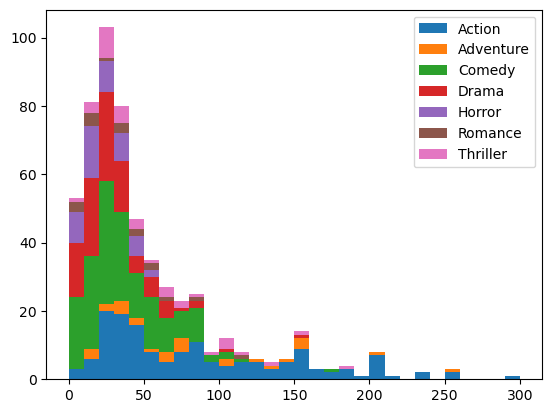

In [23]:
# Compare All Category of Genre.
list1 = list()
mylabels = list()
for gen in data.Genre.cat.categories:
    list1.append(data[data.Genre == gen].Budget)
    mylabels.append(gen)
    
plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.legend()

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


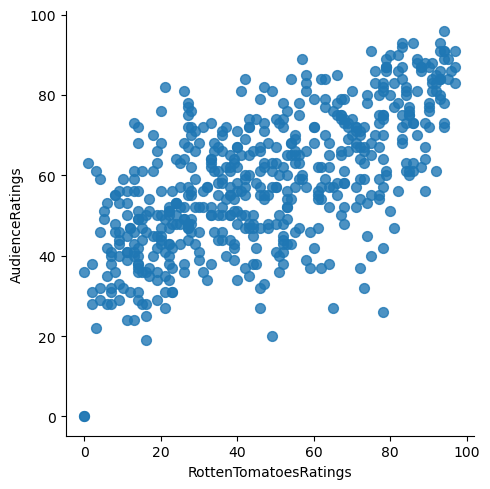

In [24]:
sns.lmplot(data=data, x = 'RottenTomatoesRatings', y='AudienceRatings', fit_reg=False,size= 5, aspect= 1, scatter_kws={'s':50})

# Model Building

### Label Encoding

In [25]:
# Convert Categorical into Numerical using Label Encoding
le = LabelEncoder()
le = le.fit_transform(data.Genre)
data['Genre'] = pd.DataFrame(le)

le = LabelEncoder()
le = le.fit_transform(data.Year)
data['Year'] = pd.DataFrame(le)

In [26]:
X = data.iloc[:,1:].values

In [27]:
X

array([[  2,  87,  81,   8,   2],
       [  1,   9,  44, 105,   1],
       [  0,  30,  52,  20,   2],
       ...,
       [  6,  89,  73,  65,   0],
       [  0,  90,  87,  24,   2],
       [  2,  14,  42,  80,   4]], dtype=int64)

### K Means Clustering

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


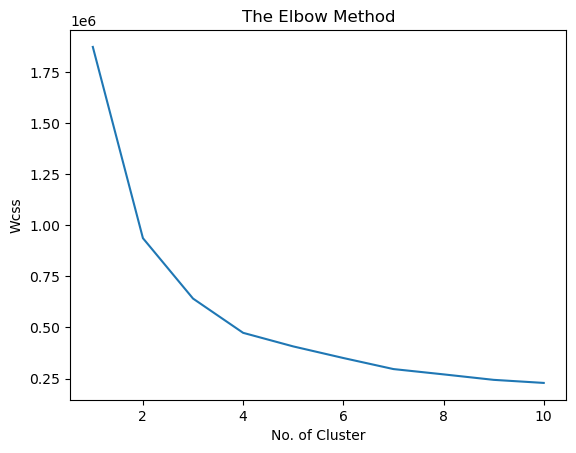

In [28]:
# Find the ideal number of group using elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', max_iter=300, n_init= 10, random_state= 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plot the Elbow graph to find the optimum number of cluster
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Cluster')
plt.ylabel('Wcss')
plt.show()

In [29]:
# KMeans Model Building
kmeans = KMeans(n_clusters = 4, init= 'k-means++', max_iter=300, n_init= 10, random_state= 0)
y_hc = kmeans.fit_predict(X)

In [30]:
# Output
y_hc

array([2, 3, 0, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0,
       0, 0, 0, 3, 2, 0, 0, 2, 0, 0, 3, 1, 2, 3, 0, 0, 2, 0, 3, 2, 0, 3,
       2, 1, 0, 2, 3, 3, 0, 2, 0, 2, 2, 2, 3, 2, 1, 0, 3, 2, 2, 0, 2, 0,
       3, 2, 1, 0, 3, 3, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 3, 0, 2, 2, 2, 0, 0, 2, 2, 3, 0, 0, 0, 2, 0, 0, 3, 0,
       3, 2, 3, 3, 0, 1, 0, 2, 2, 0, 0, 0, 1, 3, 1, 0, 2, 0, 0, 0, 3, 2,
       0, 2, 3, 0, 2, 2, 0, 3, 0, 1, 1, 0, 2, 3, 3, 2, 0, 2, 0, 2, 1, 3,
       2, 2, 3, 3, 2, 0, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 3, 2, 2, 0, 2, 0,
       2, 0, 1, 1, 3, 0, 2, 2, 3, 0, 0, 3, 0, 0, 1, 1, 2, 3, 2, 2, 1, 1,
       3, 2, 3, 2, 0, 0, 0, 2, 3, 2, 3, 0, 2, 3, 3, 2, 3, 2, 0, 3, 0, 0,
       3, 0, 0, 0, 0, 2, 0, 3, 3, 0, 0, 0, 2, 0, 0, 0, 3, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 3, 2, 0, 0, 2, 0, 2, 0, 2, 1,
       0, 2, 0, 3, 0, 2, 1, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2,

In [31]:
data['KMeans'] = pd.DataFrame(y_hc)

### Hierarchical Clustering

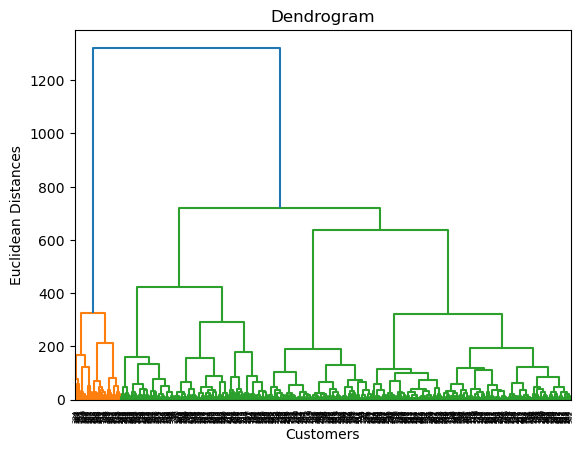

In [32]:
# Find the ideal number of group using dendogram method
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Plot the Dendogram Graph
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [33]:
# Hierarchical Model Building
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [34]:
# Output
y_hc

array([3, 0, 2, 3, 3, 1, 2, 2, 2, 3, 2, 3, 0, 3, 3, 2, 2, 3, 2, 1, 0, 0,
       2, 2, 0, 0, 3, 2, 2, 3, 2, 2, 0, 1, 3, 0, 0, 2, 3, 0, 0, 3, 2, 0,
       3, 1, 2, 3, 0, 0, 2, 3, 2, 2, 2, 3, 2, 0, 1, 2, 0, 3, 0, 0, 3, 2,
       0, 3, 1, 2, 0, 0, 0, 2, 2, 0, 1, 3, 0, 3, 2, 2, 0, 3, 2, 2, 2, 3,
       2, 2, 2, 0, 0, 2, 3, 3, 3, 2, 2, 3, 3, 0, 2, 0, 2, 3, 2, 0, 0, 2,
       0, 3, 0, 0, 2, 1, 2, 3, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 3,
       2, 3, 0, 2, 0, 3, 0, 0, 0, 1, 1, 2, 0, 0, 0, 3, 0, 2, 2, 3, 1, 0,
       3, 0, 0, 0, 3, 2, 2, 2, 1, 3, 2, 2, 1, 1, 1, 2, 0, 2, 3, 2, 0, 2,
       2, 2, 1, 1, 0, 2, 3, 3, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 3, 3, 1, 1,
       0, 2, 0, 3, 2, 0, 0, 2, 0, 3, 0, 2, 3, 0, 0, 3, 0, 3, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 3, 2, 0, 0, 2, 2, 2, 3, 2, 2, 2, 0, 3, 0, 0, 0, 0,
       2, 3, 3, 2, 2, 0, 1, 3, 2, 2, 3, 3, 0, 0, 2, 2, 2, 2, 3, 2, 3, 0,
       2, 3, 0, 0, 2, 3, 1, 2, 2, 0, 0, 3, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 0, 2, 3, 0, 3,

In [35]:
data['HC'] = pd.DataFrame(y_hc)

In [36]:
# Data Show with Both Clustering Output
data

,Film,Genre,RottenTomatoesRatings,AudienceRatings,Budget,Year,KMeans,HC
0,(500) Days of Summer,2,87,81,8,2,2,3
1,"10,000 B.C.",1,9,44,105,1,3,0
2,12 Rounds,0,30,52,20,2,0,2
3,127 Hours,1,93,84,18,3,2,3
4,17 Again,2,55,70,20,2,2,3
...,...,...,...,...,...,...,...,...
554,Your Highness,2,26,36,50,4,0,0
555,Youth in Revolt,2,68,52,18,2,2,3
556,Zodiac,6,89,73,65,0,2,0
557,Zombieland,0,90,87,24,2,2,3


### Scatter Plot of Clustering

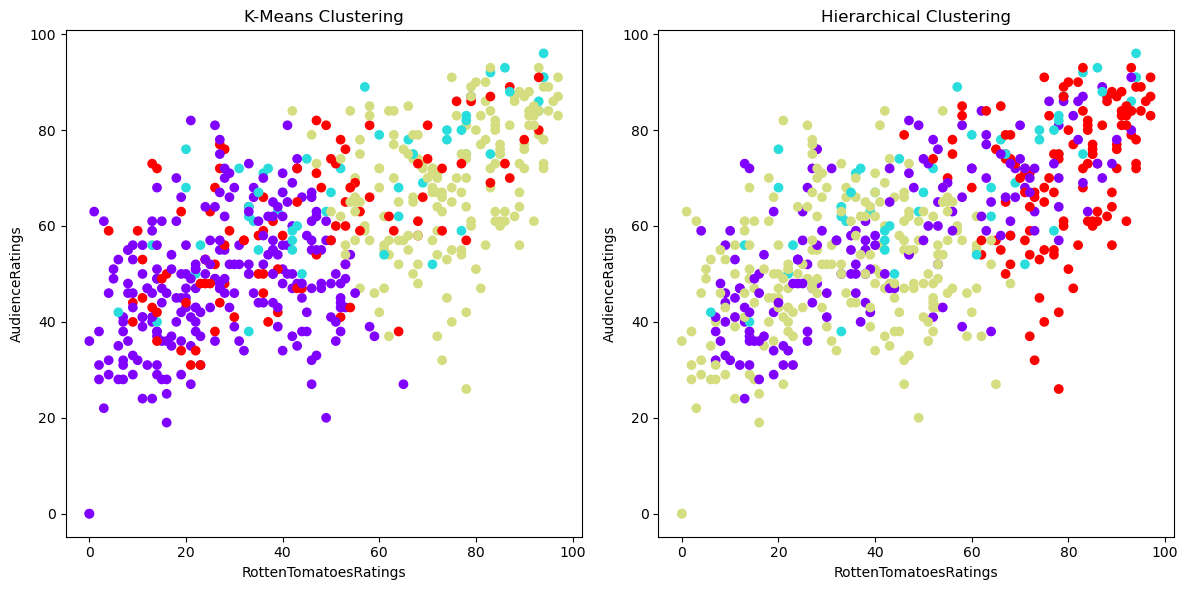

In [37]:
# Scatter plot for K-Means
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['RottenTomatoesRatings'], data['AudienceRatings'], c=data['KMeans'], cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('RottenTomatoesRatings')
plt.ylabel('AudienceRatings')

# Scatter plot for Hierarchical Clustering
plt.subplot(1, 2, 2)
plt.scatter(data['RottenTomatoesRatings'], data['AudienceRatings'], c=data['HC'], cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('RottenTomatoesRatings')
plt.ylabel('AudienceRatings')

plt.tight_layout()
plt.show()


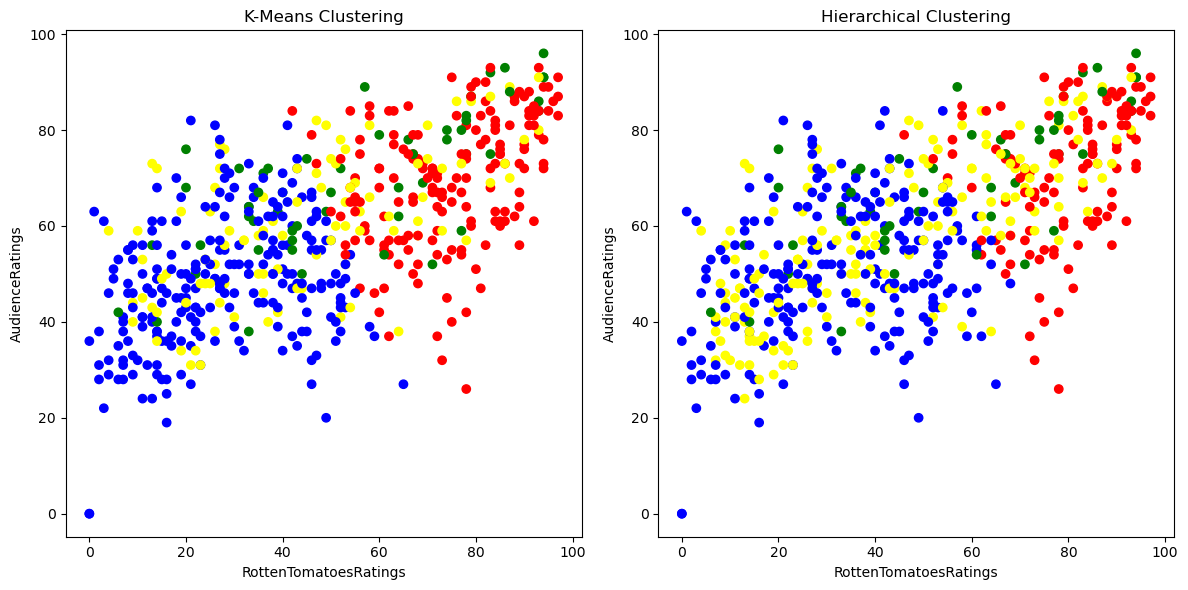

In [38]:
# Check Clusters with same colors
# Define a custom colormap for KMeans Clustering
custom_colors = ['blue', 'green', 'red', 'yellow']  # Add more colors as needed
cmap1 = mcolors.ListedColormap(custom_colors)

# Define a custom colormap for Hierarchical Clustering
custom_colors = ['yellow', 'green', 'blue', 'red']  # Add more colors as needed
cmap2 = mcolors.ListedColormap(custom_colors)

# Scatter plot for K-Means
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['RottenTomatoesRatings'], data['AudienceRatings'], c=data['KMeans'], cmap=cmap1)
plt.title('K-Means Clustering')
plt.xlabel('RottenTomatoesRatings')
plt.ylabel('AudienceRatings')

# Scatter plot for Hierarchical Clustering with custom colormap
plt.subplot(1, 2, 2)
plt.scatter(data['RottenTomatoesRatings'], data['AudienceRatings'], c=data['HC'], cmap=cmap2)
plt.title('Hierarchical Clustering')
plt.xlabel('RottenTomatoesRatings')
plt.ylabel('AudienceRatings')

plt.tight_layout()
plt.show()
